# Inferential Statistics Assignment

In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# use credit card fraud dataset
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/credit_card_fraud.csv'

### Read the credit card fraud dataset into a Pandas data frame.

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.shape

(11961, 10)

In [5]:
df.head()

,transaction,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,DEBIT,7414.00,C446504763,151707.00,144293.00,C1854925027,39000000.0,39900000.0,0
1,2,DEBIT,2899.20,C757752441,0.00,0.00,C1854925027,39000000.0,39000000.0,0
2,3,CASH_OUT,17447.35,C1004533006,0.00,0.00,C1620573488,34400000.0,35000000.0,0
3,4,CASH_OUT,477.53,C23579491,0.00,0.00,C356023140,33800000.0,33800000.0,0
4,5,CASH_IN,18184.97,C861745646,6101058.91,6119243.88,C356023140,33800000.0,33800000.0,0


### Generate a histogram that shows the data distribution of the "amount" field in the data.

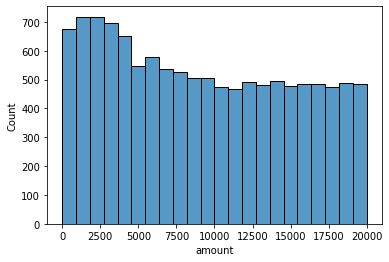

In [6]:
sb.histplot(df['amount'])

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the "amount" field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [7]:
df['amount'].sample(1000, replace=True).mean()

9224.509699999991

### Bootstrap a sampling distribution for the "amount" field's mean and generate a histogram showing the distribution of sample means.

- Generate one sampling distribution using 500 samples of size 8.
- Generate another sampling distribution using 500 samples of size 10,000.
- Re-generate the two sampling distributions multiple times, what do you notice?
- Play with the small sample size used by increasing it, is there a point where you start to see consistent results being output?

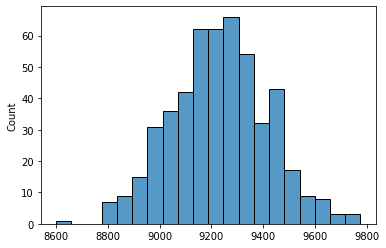

In [8]:
n_samples = 500
sample_size = 1000
sample_means = []
samples_count = 0
while samples_count < n_samples:
    sample_mean = df['amount'].sample(sample_size, replace=True).mean()
    sample_means.append(sample_mean)
    samples_count += 1

dist = sb.histplot(sample_means)

### Bayesian inference

Using the `'isFraud'` field from the data, create a distribution that shows the potential fraud rates that could have resulted in the number of frauds seen in the sample.

#### **Identify an approriate distribution to model with**

Before you start coding, what distribution would best model the count of frauds in our dataset?

Think of each customer as a trial, and think of each fraud as a 'success' (success here just means our outcome of interest).  If you get stuck you can google: `"discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments"`.

#### **The process you need to code**

1. Store the observerd sample size
2. Store the observed fraud count (this is the number of frauds actually seen in our sample)


3. Generate a random fraud rate (any number between 0-1)


4. Use the distribution you identified to generate a random number using the random fraud rate and the observed sample size (this number represents how many frauds we could see if the fraud rate was equal to the randomly generated rate)

5. Write a for loop to repeat this process many times (>= 100000)
6. If the random number from step 4 is equal to the observed fraud count, save it to a list of possible population fraud rates. If these two are equal it shows that the random rate could be the true fraud rate of the population our sample came from.

7. Plot the distribution of the possible fraud rates your simulation created.
8. Compare the distribution to the observed rate in the sample.

In [19]:
n_observed = df['isFraud'].size
n_fraud = df['isFraud'].sum()
fraud_rate = df['isFraud'].mean()

In [36]:
random_n_fraud = np.random.binomial(n_observed, random_rate)
possible_fraud_rates = []

for _ in range(10000000):
    random_fraud_rate = np.random.beta(a=1, b=1)
    random_n_fraud = np.random.binomial(n_observed, random_fraud_rate)
    if random_n_fraud == n_fraud:
        possible_fraud_rates.append(random_fraud_rate)


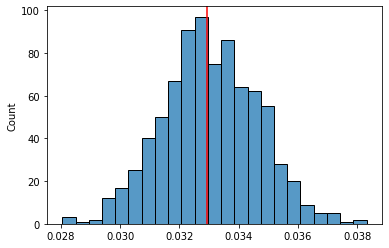

In [37]:
sb.histplot(possible_fraud_rates)
plt.axvline(fraud_rate, c='r')